In [2]:
import csv
import datetime
import tqdm
import random
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def get_wordnet_pos(treebank_tag):
    """Map NLTK POS tags to WordNet POS tags."""
    if treebank_tag.startswith('N'):
        return wordnet.NOUN
    return None


def extract_singular_nouns(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    
    lemmatizer = WordNetLemmatizer()
    
    singular_nouns = []
    for word, tag in tagged:
        wn_tag = get_wordnet_pos(tag)
        if wn_tag == wordnet.NOUN:
            singular_form = lemmatizer.lemmatize(word, pos=wn_tag)
            singular_nouns.append(singular_form)
    
    return singular_nouns


[nltk_data] Downloading package punkt to /home/gabor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/gabor/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/gabor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
titles = []
nouns = []
with open("BooksDatasetClean.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in tqdm.tqdm(reader):
        published = datetime.datetime.strptime(
            f"{row['Publish Date (Year)']},{row['Publish Date (Month)']},1",
            "%Y,%B,%d").date()
        # initial filter&format
        lower_alphas = [w.lower().strip() for w in row['Title'].split() if w.isalpha()]
        extracted_nouns = extract_singular_nouns(" ".join(lower_alphas))
        assert len(extracted_nouns) <= len(lower_alphas)
        
        titles.append((published, lower_alphas))
        nouns.append((published, extracted_nouns))


103063it [00:38, 2691.86it/s]


In [4]:
sorted_nouns = sorted(nouns)
sorted_titles = sorted(titles)

In [6]:
import numpy as np
np.array([len(title) for _, title in sorted_titles]).mean()

5.701774642694274

In [7]:
import itertools
import matplotlib.pyplot as plt

word_have_seen = set()
word_counts = []

word_pair_have_seen = set()
word_pair_counts = []

noun_have_seen = set()
noun_counts = []

noun_pair_have_seen = set()
noun_pair_counts = []

for dt, words in sorted_titles:
    for word in words:
        word_have_seen.add(word)
    word_counts.append(len(word_have_seen))
    for combos in itertools.combinations(words, 2):
        canonical_name = "|".join(sorted(combos))
        word_pair_have_seen.add(canonical_name)
    word_pair_counts.append(len(word_pair_have_seen))

for dt, nouns in sorted_nouns:
    for noun in nouns:
        noun_have_seen.add(noun)
    noun_counts.append(len(noun_have_seen))
    for combos in itertools.combinations(nouns, 2):
        canonical_name = "|".join(sorted(combos))
        noun_pair_have_seen.add(canonical_name)
    noun_pair_counts.append(len(noun_pair_have_seen))

Text(0.5, 1.0, 'Unique Words in Book Titles')

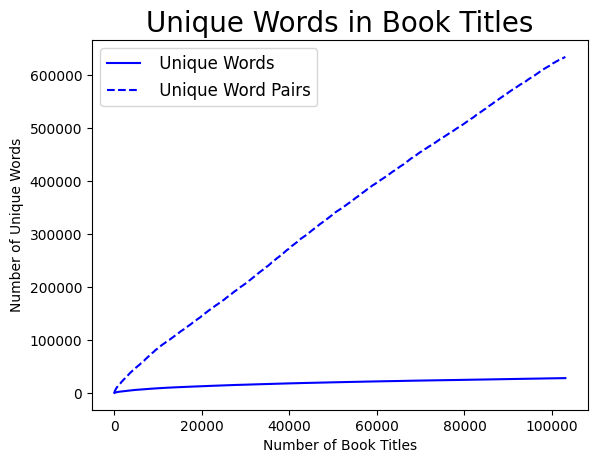

In [8]:
plt.plot(range(len(word_counts)), word_counts, "b-", label=" Unique Words")
plt.plot(range(len(word_pair_counts)), word_pair_counts, "b--", label=" Unique Word Pairs")
#plt.plot(range(len(noun_counts)), noun_counts, "r-", label=" Unique Nouns")
#plt.plot(range(len(noun_pair_counts)), noun_pair_counts, "r--", label=" Unique Noun Pairs")

#plt.plot(range(10_000), word_counts[:10_000], "b-", label=" Unique Words")


plt.xlabel("Number of Book Titles")
plt.ylabel("Number of Unique Words")
plt.legend(fontsize=12)
plt.title("Unique Words in Book Titles", fontsize=20)
#plt.loglog()
#plt.xlim(1,10)
#plt.ylim(1, 100)

In [88]:
word_counts[-1]

27938

In [91]:
#print((noun_counts[-1] - noun_counts[40_000]) /60_000)
print((word_counts[1000] - word_counts[999]) / 1)

1.0


In [69]:
import importlib

In [97]:
import pa_model as pa
importlib.reload(pa)

<module 'pa_model' from '/home/gabor/CCL/SO_Post_Analyzer/pa_model.py'>

100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.90s/it]


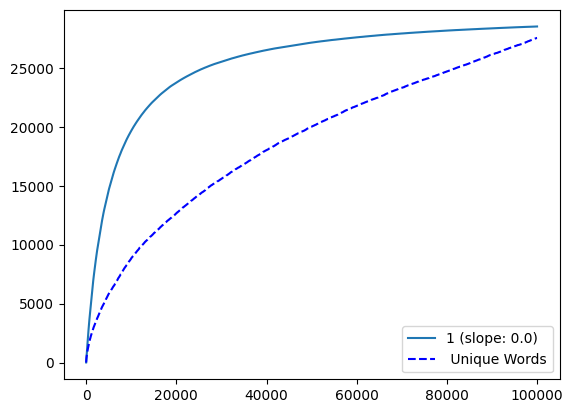

In [154]:
SEGMENT = 100_000
BASE_SET_SIZE = 30_000
for update in tqdm.tqdm([1]):
    experiment = pa.run_experiment_with_updates_multi(16,4, BASE_SET_SIZE,SEGMENT, 1, update, 5.7,)
    slope = round((experiment[-1] - experiment[-5]) / 4, 4)
    plt.plot(range(SEGMENT), experiment, label=f"{update} (slope: {slope})")

plt.plot(range(SEGMENT), word_counts[:SEGMENT], "b--", label=" Unique Words")

plt.legend()
